2. Multiple regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

2.9 Example

In [2]:
def plot_graph(X, Y, x, y):
    # (X, Y) : data
    # (x, y) : regression line
    fig, ax = plt.subplots(dpi=100)
    ax.set_title('Relationship between highest temperature and family expenditure for icecream and sherbet')
    ax.set_xlabel('Monthly average highest temperature (Celsius)')
    ax.set_ylabel('Family expenditure (JPY)')
    ax.set_xlim(0, 35)
    ax.set_ylim(-250, 2000)
    ax.grid()
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'r')
    fig.show()

In [3]:
# X : Monthly average highest temperature
# Y : Family expenditure for icecream and sherbet

X = np.array([
     9.1, 11.2, 12.3, 18.9, 22.2, 26. , 30.9, 31.2, 28.8, 23. , 18.3,
    11.1,  8.3,  9.1, 12.5, 18.5, 23.6, 24.8, 30.1, 33.1, 29.8, 23. ,
    16.3, 11.2,  9.6, 10.3, 16.4, 19.2, 24.1, 26.5, 31.4, 33.2, 28.8,
    23. , 17.4, 12.1, 10.6,  9.8, 14.5, 19.6, 24.7, 26.9, 30.5, 31.2,
    26.9, 23. , 17.4, 11. , 10.4, 10.4, 15.5, 19.3, 26.4, 26.4, 30.1,
    30.5, 26.4, 22.7, 17.8, 13.4, 10.6, 12.2, 14.9, 20.3, 25.2, 26.3,
    29.7, 31.6, 27.7, 22.6, 15.5, 13.8, 10.8, 12.1, 13.4, 19.9, 25.1,
    26.4, 31.8, 30.4, 26.8, 20.1, 16.6, 11.1,  9.4, 10.1, 16.9, 22.1,
    24.6, 26.6, 32.7, 32.5, 26.6, 23. , 17.7, 12.1, 10.3, 11.6, 15.4,
    19. , 25.3, 25.8, 27.5, 32.8, 29.4, 23.3, 17.7, 12.6, 11.1, 13.3,
    16. , 18.2, 24. , 27.5, 27.7, 34.1, 28.1, 21.4, 18.6, 12.3])

Y = np.array([
    463.,  360.,  380.,  584.,  763.,  886., 1168., 1325.,  847.,
    542.,  441.,  499.,  363.,  327.,  414.,  545.,  726.,  847.,
   1122., 1355.,  916.,  571.,  377.,  465.,  377.,  362.,  518.,
    683.,  838., 1012., 1267., 1464., 1000.,  629.,  448.,  466.,
    404.,  343.,  493.,  575.,  921., 1019., 1149., 1303.,  805.,
    739.,  587.,  561.,  486.,  470.,  564.,  609.,  899.,  946.,
   1295., 1325.,  760.,  667.,  564.,  633.,  478.,  450.,  567.,
    611.,  947.,  962., 1309., 1307.,  930.,  668.,  496.,  650.,
    506.,  423.,  531.,  672.,  871.,  986., 1368., 1319.,  924.,
    716.,  651.,  708.,  609.,  535.,  717.,  890., 1054., 1077.,
   1425., 1378.,  900.,  725.,  554.,  542.,  561.,  459.,  604.,
    745., 1105.,  973., 1263., 1533., 1044.,  821.,  621.,  601.,
    549.,  572.,  711.,  819., 1141., 1350., 1285., 1643., 1133.,
    784.,  682.,  587.])

2.9.1 numpy.polyfit

In [4]:
# degree = 2
W = np.polyfit(X, Y, 2)
W

array([  1.73160796, -33.14302425, 635.74825774])

<ipython-input-2-c1827f385a49>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


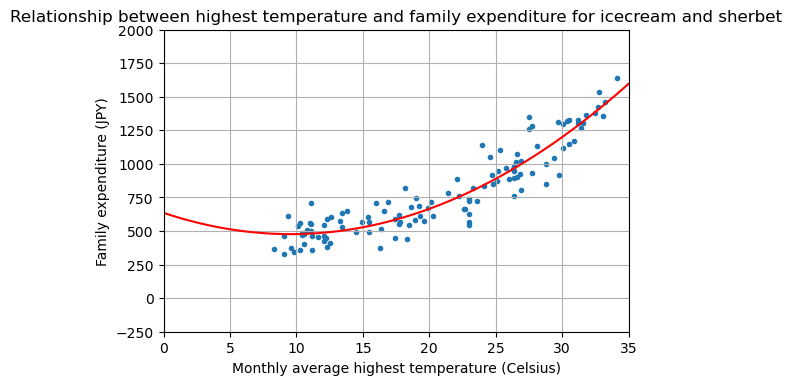

In [5]:
x = np.linspace(0, 35, 100)
y_hat = np.polyval(W, x)
plot_graph(X, Y, x, y_hat)

In [6]:
# degree = 3
W = np.polyfit(X, Y, 3)
W

array([ 5.01164586e-02, -1.44685888e+00,  2.92887138e+01,  2.64628814e+02])

<ipython-input-2-c1827f385a49>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


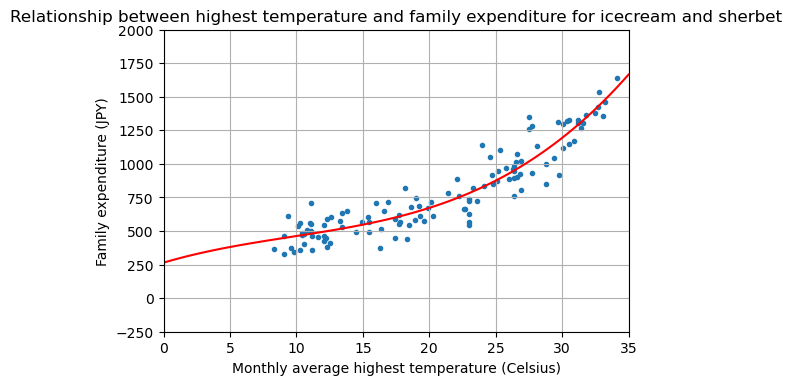

In [7]:
x = np.linspace(0, 35, 100)
y_hat = np.polyval(W, x)
plot_graph(X, Y, x, y_hat)

In [8]:
# degree = 4
W = np.polyfit(X, Y, 4)
W

array([-4.27358629e-03,  4.12591380e-01, -1.23937689e+01,  1.67566320e+02,
       -3.47044444e+02])

<ipython-input-2-c1827f385a49>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


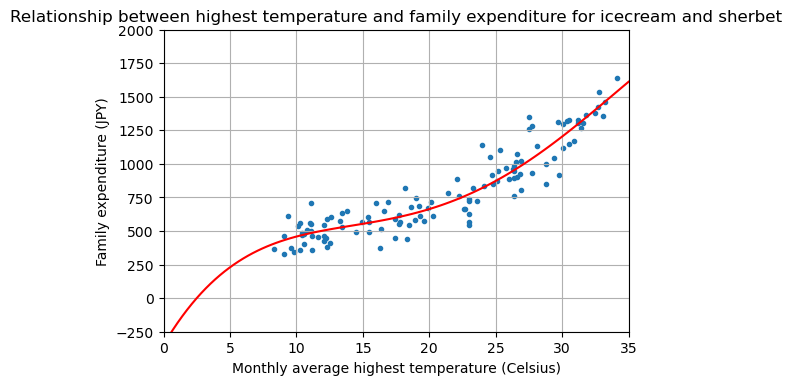

In [9]:
x = np.linspace(0, 35, 100)
y_hat = np.polyval(W, x)
plot_graph(X, Y, x, y_hat)

2.9.2 sklearn.linear_model.LinearRegression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [11]:
reg = make_pipeline(PolynomialFeatures(3), LinearRegression())
reg.fit(X.reshape(-1, 1), Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [12]:
print(f'coefficient : {reg[1].coef_}')
print(f'intercept : {reg[1].intercept_}')
print(f'score : {reg.score(X.reshape(-1, 1), Y)}')

coefficient : [ 0.         29.28871381 -1.44685888  0.05011646]
intercept : 264.62881410156945
score : 0.8784609747360882


<ipython-input-2-c1827f385a49>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


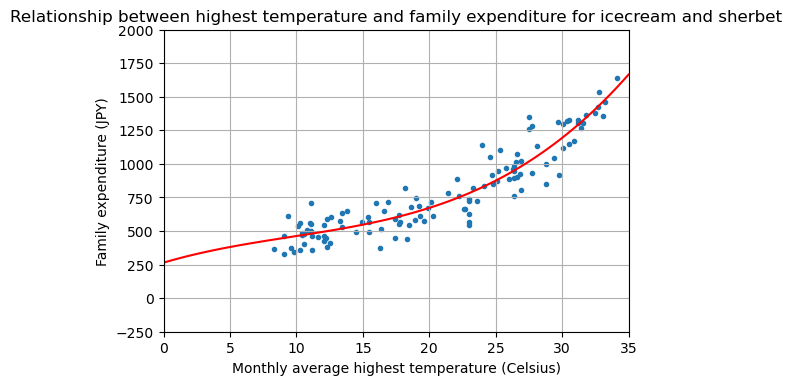

In [13]:
x = np.linspace(0, 35, 100)
y_hat = reg.predict(x.reshape(-1, 1))
plot_graph(X, Y, x, y_hat)

2.10 Exercise

In [14]:
# data
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

In [19]:
def plot_graph_exercise(X, Y, x, y):
    # (X, Y) : data
    # (x, y) : regression line
    fig, ax = plt.subplots(dpi=100)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.grid()
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'r')
    fig.show()

w : [3.31034483 0.43103448]


<ipython-input-19-2f8f975a0beb>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


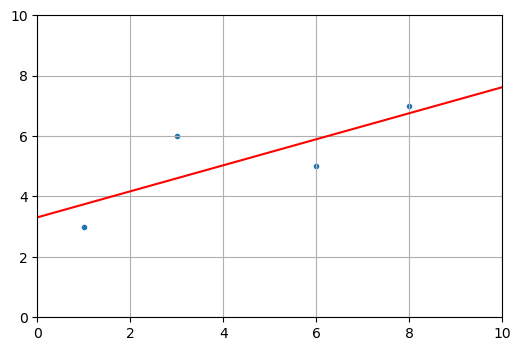

In [23]:
# y = w0 + w1 * x
# estimate w0 and w1 
X = np.array([[1, 1], [1, 3], [1, 6], [1, 8]]) # design matrix
y = D[:, 1]
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

x = np.linspace(0, 10, 100)
y_hat = w[0] + w[1] * x
print(f'w : {w}')
plot_graph_exercise(D[:, 0], D[:, 1], x, y_hat)

w : [ 2.66034483  0.88103448 -0.05      ]


<ipython-input-19-2f8f975a0beb>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


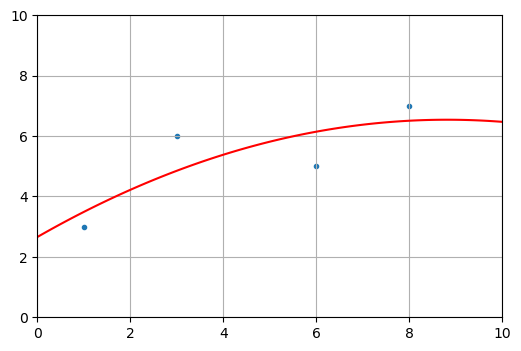

In [24]:
# y = w0 + w1 * x + w2 * x^2
# estimate w0 ~ w2
X = np.array([[1, 1, 1], [1, 3, 9], [1, 6, 36], [1, 8, 64]]) # design matrix
y = D[:, 1]
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

x = np.linspace(0, 10, 100)
y_hat = w[0] + w[1] * x + w[2] * x ** 2
print(f'w : {w}')
plot_graph_exercise(D[:, 0], D[:, 1], x, y_hat)

In [25]:
# R^2
x = D[:, 0]
y = D[:, 1]
y_hat = w[0] + w[1] * x + w[2] * x ** 2
e = y - y_hat

ave_y = np.average(y)
ave_y_hat = np.average(y_hat)
ave_e = np.average(e)
var_y = 0
var_y_hat = 0
var_e = 0
for i in range(len(y)):
    var_y += (y[i] - ave_y) ** 2
    var_y_hat += (y_hat[i] - ave_y_hat) ** 2
    var_e += (e[i] - ave_e) ** 2
var_y /= len(y)
var_y_hat /= len(y)
var_e /= len(y)

print(f'R^2 : {var_y_hat / var_y}')
print(f'var(y) : {var_y}')
print(f'var(y_hat) + var(e) : {var_y_hat + var_e}')
print(f'average y : {ave_y}')
print(f'average y_hat : {ave_y_hat}')
print(f'average e : {ave_e}')

R^2 : 0.6443349753694552
var(y) : 2.1875
var(y_hat) + var(e) : 2.1874999999999933
average y : 5.25
average y_hat : 5.249999999999947
average e : 5.284661597215745e-14


w : [-1.22857143  5.40952381 -1.27142857  0.09047619]


<ipython-input-19-2f8f975a0beb>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


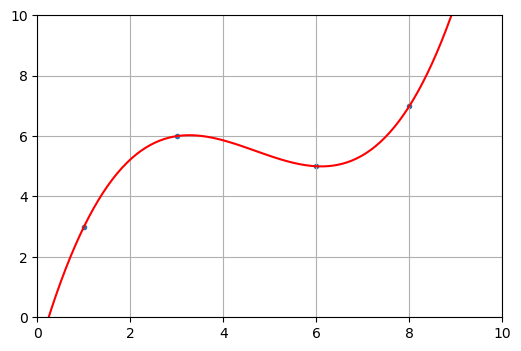

In [26]:
# y = w0 + w1 * x + w2 * x^2 + w3 * x^3
# estimate w0 ~ w3 
X = np.array([[1, 1, 1, 1], [1, 3, 9, 27], [1, 6, 36, 216], [1, 8, 64, 512]]) # design matrix
y = D[:, 1]
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

x = np.linspace(0, 10, 100)
y_hat = w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3
print(f'w : {w}')
plot_graph_exercise(D[:, 0], D[:, 1], x, y_hat)

In [27]:
# R^2
x = D[:, 0]
y = D[:, 1]
y_hat = w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3
e = y - y_hat

ave_y = np.average(y)
ave_y_hat = np.average(y_hat)
ave_e = np.average(e)
var_y = 0
var_y_hat = 0
var_e = 0
for i in range(len(y)):
    var_y += (y[i] - ave_y) ** 2
    var_y_hat += (y_hat[i] - ave_y_hat) ** 2
    var_e += (e[i] - ave_e) ** 2
var_y /= len(y)
var_y_hat /= len(y)
var_e /= len(y)

print(f'R^2 : {var_y_hat / var_y}')
print(f'var(y) : {var_y}')
print(f'var(y_hat) + var(e) : {var_y_hat + var_e}')
print(f'average y : {ave_y}')
print(f'average y_hat : {ave_y_hat}')
print(f'average e : {ave_e}')

R^2 : 1.0000000000002822
var(y) : 2.1875
var(y_hat) + var(e) : 2.1875000000006173
average y : 5.25
average y_hat : 5.249999999997289
average e : 2.7103874700173947e-12
